In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# word frequency & word cloud:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Make plots a bit nicer
plt.rcParams["figure.figsize"] = (8, 5)

import pandas as pd
url = "https://raw.githubusercontent.com/Pontakorn-Wich/Mini_project/master/data/books_1250_above_reviews.csv"
df = pd.read_csv(url)

print("Data shape:", df.shape)
print(df.head())

Data shape: (46358, 9)
    book_id                           user_id  \
0  13526165  8842281e1d1347389f2ab93d60773d4d   
1   9938498  8842281e1d1347389f2ab93d60773d4d   
2   2767052  8842281e1d1347389f2ab93d60773d4d   
3    136251  8842281e1d1347389f2ab93d60773d4d   
4  15507958  7504b2aee1ecb5b2872d3da381c6c91e   

                          review_id  rating  \
0  51fe3e46c7f8eb39f5623d1bd8bbbbfc       5   
1  bff5654c639c7b008571c3d4398d930a       4   
2  248c011811e945eca861b5c31a549291       5   
3  132eab4c9a3724493204cc083e0e2ecc       5   
4  63ff74279e46b247cb1754313b160006       4   

                                         review_text  \
0  My wife suggested I read this book, and I resi...   
1  Great story of the US Ambassador to Germany an...   
2  I cracked and finally picked this up. Very enj...   
3  Loved every minute. So sad there isn't another...   
4  I finished reading this days ago and cant get ...   

                       date_added                    date_upda

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46358 entries, 0 to 46357
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   book_id       46358 non-null  int64 
 1   user_id       46358 non-null  object
 2   review_id     46358 non-null  object
 3   rating        46358 non-null  int64 
 4   review_text   46358 non-null  object
 5   date_added    46358 non-null  object
 6   date_updated  46358 non-null  object
 7   n_votes       46358 non-null  int64 
 8   n_comments    46358 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.2+ MB


In [18]:
df['book_id'].unique()

array([13526165,  9938498,  2767052,   136251, 15507958,  6218281,
           3636, 27161156, 18659623, 23513349])

In [5]:
# === 1.1 Rating summary (Table 2) ===
rating_desc = df["rating"].describe()
print("Rating descriptive statistics:")
print(rating_desc)

# small table-like summary
rating_summary = pd.DataFrame({
    "Metric": ["Total reviews", "Min rating", "Max rating", "Mean rating", "Median rating"],
    "Value": [
        int(rating_desc["count"]),
        int(rating_desc["min"]),
        int(rating_desc["max"]),
        round(float(rating_desc["mean"]), 2),
        float(df["rating"].median())
    ]
})
print("\nTable 2: Summary of Rating Distribution")
print(rating_summary.to_string(index=False))


Rating descriptive statistics:
count    46358.000000
mean         4.185491
std          1.100960
min          0.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

Table 2: Summary of Rating Distribution
       Metric    Value
Total reviews 46358.00
   Min rating     0.00
   Max rating     5.00
  Mean rating     4.19
Median rating     5.00


In [6]:
# === 1.2 Missing values (Table 4) ===
missing_counts = df.isna().sum()

missing_table = pd.DataFrame({
    "Column": missing_counts.index,
    "Missing Count": missing_counts.values,
    "Status": ["Complete" if m == 0 else "Has Missing" for m in missing_counts.values]
})

print("\nTable 4: Missing Values and Data Completeness")
print(missing_table.to_string(index=False))



Table 4: Missing Values and Data Completeness
      Column  Missing Count   Status
     book_id              0 Complete
     user_id              0 Complete
   review_id              0 Complete
      rating              0 Complete
 review_text              0 Complete
  date_added              0 Complete
date_updated              0 Complete
     n_votes              0 Complete
  n_comments              0 Complete


In [19]:
# === 2. Reviews per selected book (Table 3) ===

# Mapping from book_id to primary genre (fill with your real mapping)
book_genre_map = {
    23513349: "poetry",
    9938498: "history / historical fiction / biography",
    3636: "children",
    18659623: "comics / graphic",
    6218281: "mystery / thriller / crime",
    27161156: "non-fiction",
    15507958: "romance",
    136251: "fantasy / paranormal",
    2767052: "young-adult",
    13526165: "fiction"
}

# Count reviews for each book_id
book_review_counts = df["book_id"].value_counts().reset_index()
book_review_counts.columns = ["book_id", "review_count"]

# Keep only the selected (all the books in the map)
selected_book_ids = list(book_genre_map.keys())
table3 = book_review_counts[book_review_counts["book_id"].isin(selected_book_ids)].copy()

# Add genre column
table3["genre"] = table3["book_id"].map(book_genre_map)

# Sort by review_count (optional)
table3 = table3.sort_values(by="review_count", ascending=False)

print("\nTable 3: Number of Reviews per Selected Book")
print(table3[["book_id", "genre", "review_count"]].to_string(index=False))


Table 3: Number of Reviews per Selected Book
 book_id                                    genre  review_count
 2767052                              young-adult         15937
15507958                                  romance          7902
  136251                     fantasy / paranormal          5496
    3636                                 children          5365
13526165                                  fiction          2924
23513349                                   poetry          2561
 6218281               mystery / thriller / crime          1764
27161156                              non-fiction          1727
 9938498 history / historical fiction / biography          1370
18659623                         comics / graphic          1312


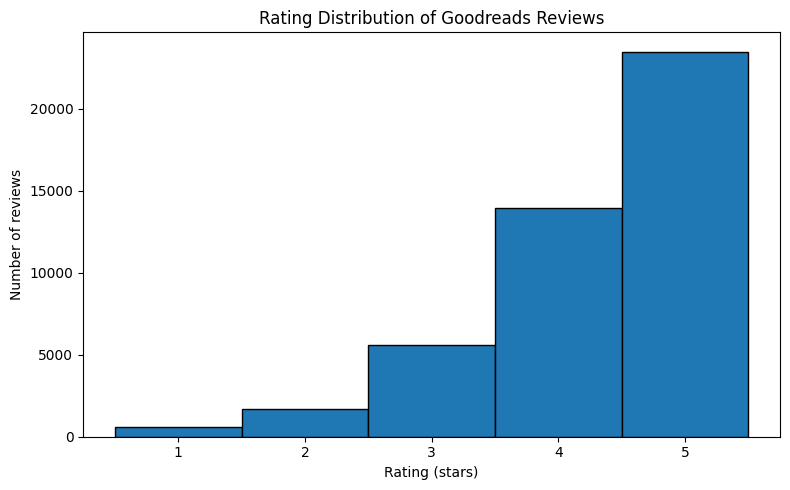

In [20]:
# === 3. Rating distribution (Figure) ===
plt.figure()
plt.hist(df["rating"], bins=[0.5,1.5,2.5,3.5,4.5,5.5], edgecolor="black")
plt.xticks([1,2,3,4,5])
plt.xlabel("Rating (stars)")
plt.ylabel("Number of reviews")
plt.title("Rating Distribution of Goodreads Reviews")
plt.tight_layout()
plt.show()



Review length (words) descriptive statistics:
count    46358.000000
mean        77.091850
std        118.618707
min          1.000000
25%         15.000000
50%         38.000000
75%         88.000000
max       2933.000000
Name: review_length_words, dtype: float64


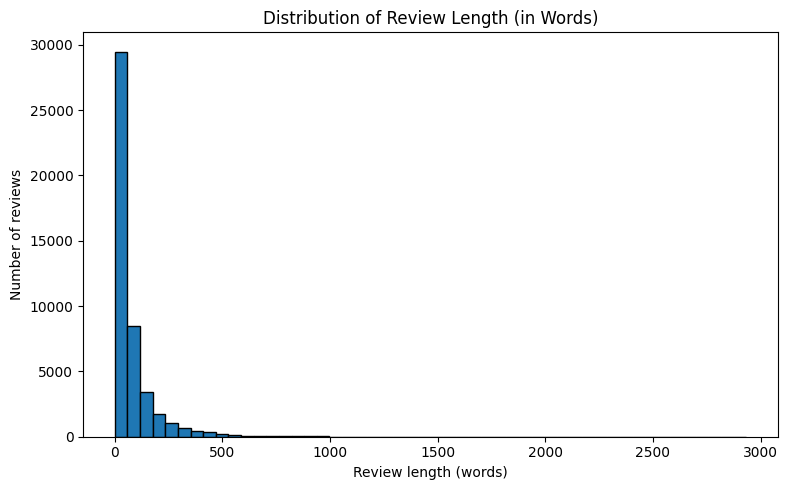

In [21]:
# === 4. Review length distribution (Figure) ===

# Length in words
df["review_length_words"] = df["review_text"].astype(str).str.split().str.len()

print("\nReview length (words) descriptive statistics:")
print(df["review_length_words"].describe())

# Histogram (you can tweak bins, max length, etc.)
plt.figure()
plt.hist(df["review_length_words"], bins=50, edgecolor="black")
plt.xlabel("Review length (words)")
plt.ylabel("Number of reviews")
plt.title("Distribution of Review Length (in Words)")
plt.tight_layout()
plt.show()


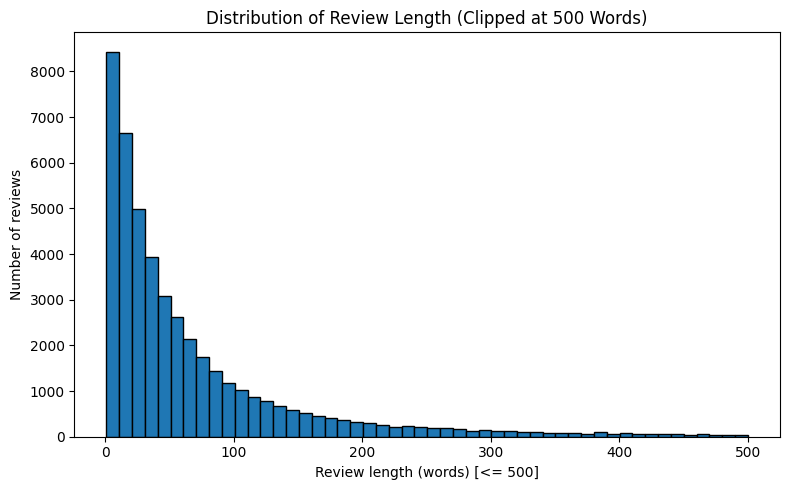

In [22]:
# Optional: histogram up to 500 words
max_len = 500
subset = df[df["review_length_words"] <= max_len]

plt.figure()
plt.hist(subset["review_length_words"], bins=50, edgecolor="black")
plt.xlabel(f"Review length (words) [<= {max_len}]")
plt.ylabel("Number of reviews")
plt.title("Distribution of Review Length (Clipped at 500 Words)")
plt.tight_layout()
plt.show()



Top 20 most frequent words (raw, before preprocessing):
word  count
 the 183762
 and 104399
  to  93114
  it  79489
  of  75498
this  55079
book  52445
  in  51099
  is  49229
that  46845
 was  42978
 but  30636
 for  29661
read  29386
with  22446
 you  21638
  as  21142
  me  20793
 not  19978
  so  19682


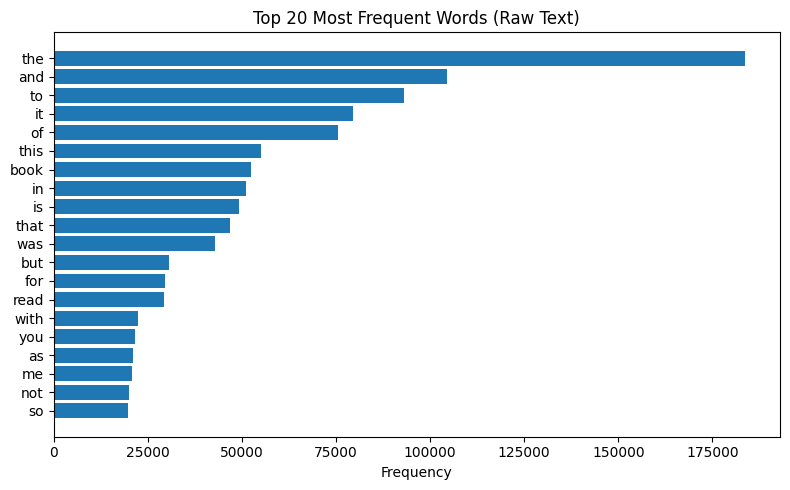

In [23]:
# === 5. Word frequency (before preprocessing) ===

# Simple vectorizer on raw review_text
vectorizer = CountVectorizer(
    stop_words=None,      # keep stopwords for "before preprocessing" view
    max_features=10000,   # you can adjust
)

X = vectorizer.fit_transform(df["review_text"].astype(str))
word_counts = np.asarray(X.sum(axis=0)).flatten()
vocab = np.array(vectorizer.get_feature_names_out())

# Build a DataFrame of word frequencies
freq_df = pd.DataFrame({
    "word": vocab,
    "count": word_counts
}).sort_values(by="count", ascending=False)

print("\nTop 20 most frequent words (raw, before preprocessing):")
print(freq_df.head(20).to_string(index=False))

# Bar chart for top 20 words
top_n = 20
top_words = freq_df.head(top_n)

plt.figure()
plt.barh(top_words["word"][::-1], top_words["count"][::-1])
plt.xlabel("Frequency")
plt.title(f"Top {top_n} Most Frequent Words (Raw Text)")
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


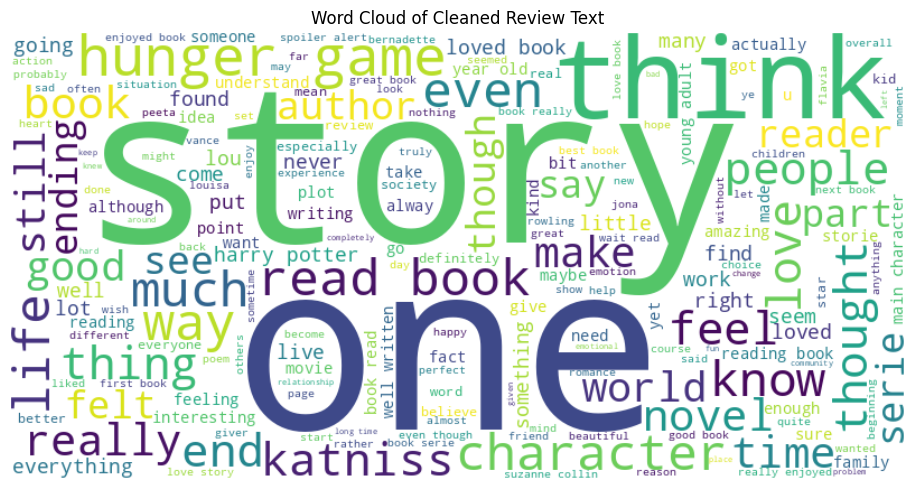

In [24]:
# === 6. Word cloud (after simple cleaning) ===

import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def simple_clean(text):
    # lowercase
    text = str(text).lower()
    # remove non-letters
    text = re.sub(r"[^a-z\s]", " ", text)
    # collapse spaces
    text = re.sub(r"\s+", " ", text).strip()
    # remove stopwords
    tokens = [w for w in text.split() if w not in stop_words]
    return " ".join(tokens)

df["simple_clean_text"] = df["review_text"].apply(simple_clean)

# Combine all text into one big string
all_text = " ".join(df["simple_clean_text"].tolist())

# Generate word cloud
wc = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Cleaned Review Text")
plt.tight_layout()
plt.show()
